Name:Subash PR
Department:Artificial Intelligence & Data Science
Year:III-yr
Title:IPL 2008-2022

Problem Statement:This project aims to predict the total runs scored in an over of an IPL match based on factors like batter, bowler, over number, and innings. Accurate run prediction can help teams make strategic decisions during matches. The model will use historical IPL data from 2008 to 2022 for training and evaluation 

Objective:The objective of this project is to develop a machine learning model that can predict the total number of runs scored in a given over of an IPL match. The model will analyze historical IPL data from 2008 to 2022, considering features like batter, bowler, over number, innings, and match conditions to assist teams in making data-driven strategies and performance analysis.

Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

Load the CSV file


In [2]:
data = pd.read_csv("IPL Dataset 2008-2022.csv")

Convert to a dataframe

In [3]:
df=pd.DataFrame(data)

Convert to a dataframe

In [4]:
df=pd.DataFrame(data)

Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

Shape of the dataset

In [6]:
df.shape

(225954, 17)

Columns in the dataset

In [7]:
df.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [8]:
df.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954.000000,225954.000000,225954.00000,225954.000000,225954.000000
mean,8.320470e+05,1.483868,9.185679,3.619750,1.243523,0.066907,1.31043,0.000093,0.049351
std,3.379542e+05,0.503104,5.681797,1.810633,1.618166,0.341470,1.60605,0.009640,0.216600
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.012620e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,8.297370e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.00000,0.000000,0.000000
75%,1.178395e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.00000,0.000000,0.000000
max,1.312200e+06,6.000000,19.000000,10.000000,6.000000,7.000000,7.00000,1.000000,1.000000


Handling Missing Values

In [9]:
df.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [10]:
df= df.dropna(axis=1, how='any')

In [11]:
df.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'BattingTeam'],
      dtype='object')

Duplicates

In [12]:
num_duplicates = df.duplicated().sum()

In [13]:
df=df.drop_duplicates()
df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,0,1,1,0,0,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,1,0,0,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,0,1,1,0,0,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,1,0,1,0,0,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,0,0,0,0,0,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,0,1,1,0,0,Royal Challengers Bangalore


In [14]:
y=df['total_run']

Encoding


In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
df_pandas_encoded = pd.get_dummies(df, columns = ['batter','bowler','non-striker'],drop_first=True)

In [17]:
encoder=OneHotEncoder(sparse_output=False)

In [18]:
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()

In [19]:
one_hot_encoded=encoder.fit_transform(df[categorical_columns])
one_hot_df=pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))

In [20]:
df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

In [21]:
df1=df_sklearn_encoded

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Columns: 1699 entries, ID to BattingTeam_Sunrisers Hyderabad
dtypes: float64(1690), int64(9)
memory usage: 2.9 GB


In [23]:
n_columns=df.select_dtypes(include=np.number).columns

In [24]:
n_columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery'],
      dtype='object')

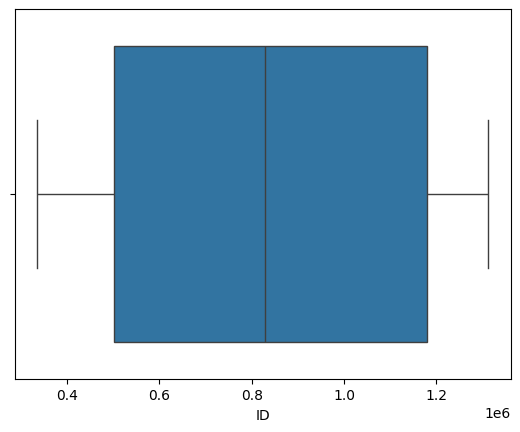

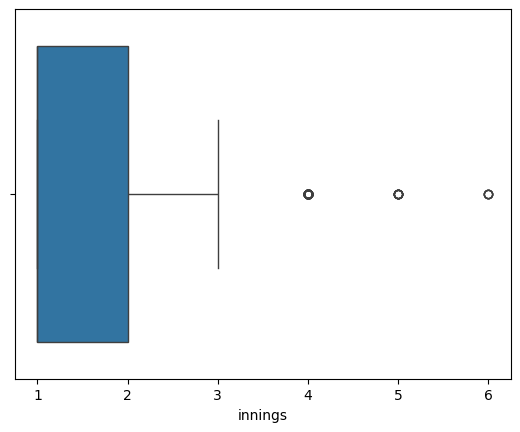

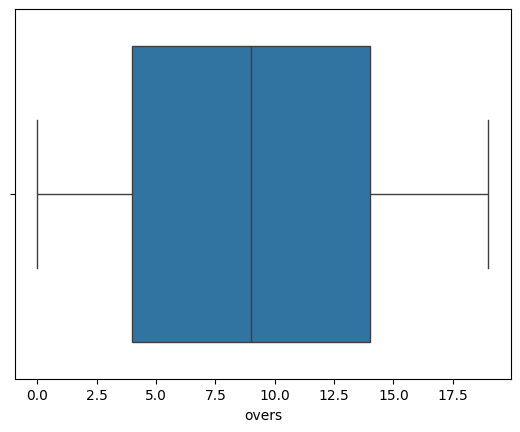

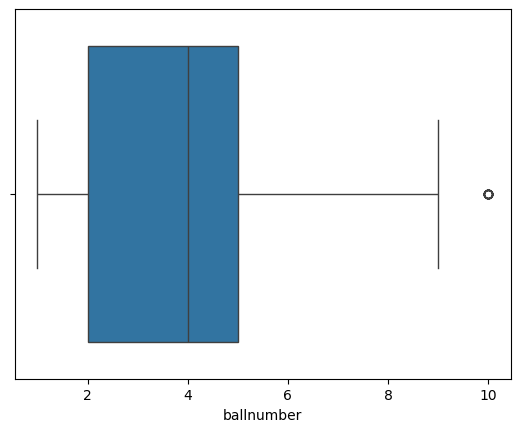

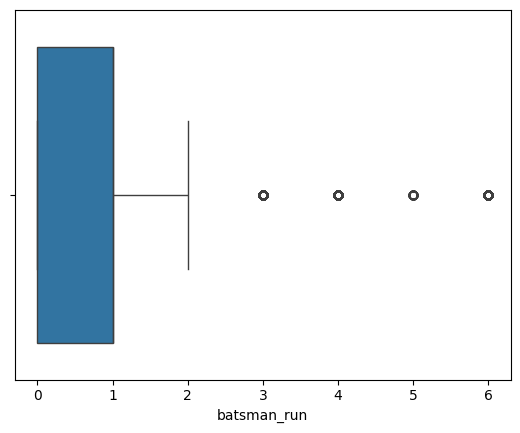

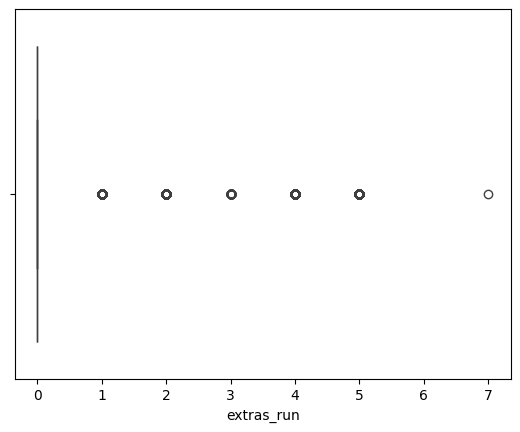

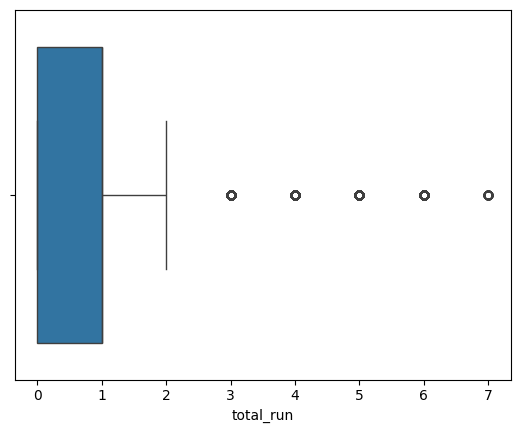

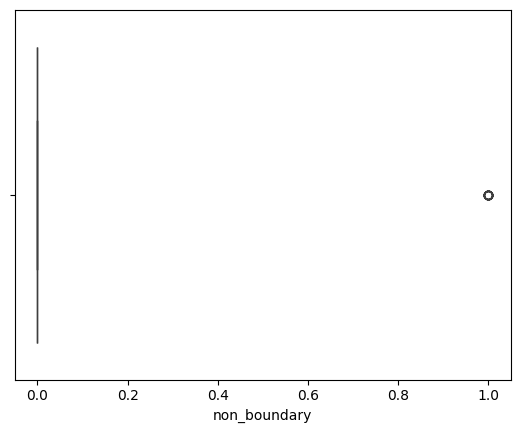

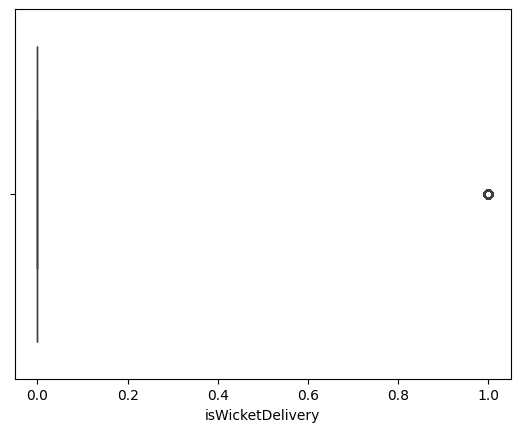

In [25]:
for column in n_columns:
  sns.boxplot(data=df1,x=column)
  plt.show()

In [26]:
#Handling Outlier
def handling_outliers(df):
  for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    Lower_bound=q1-1.5*iqr
    Upper_bound=q3+1.5*iqr
    df1[col]=df1[col].apply(lambda x:Lower_bound if x>Lower_bound else Upper_bound if x> Upper_bound else x)
  return df1


In [27]:
df1=handling_outliers(df1)
df1.head()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,batter_A Ashish Reddy,...,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiant,BattingTeam_Rising Pune Supergiants,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad
0,-514437.5,-0.5,-11.0,-2.5,-1.5,0.0,-1.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-514437.5,-0.5,-11.0,-2.5,-1.5,0.0,-1.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-514437.5,-0.5,-11.0,-2.5,-1.5,0.0,-1.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-514437.5,-0.5,-11.0,-2.5,-1.5,0.0,-1.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-514437.5,-0.5,-11.0,-2.5,-1.5,0.0,-1.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
fig=plt.figure(figsize=(8,5),dpi=100,facecolor='darkblue')

<Figure size 800x500 with 0 Axes>

Line Plot

In [29]:
x=df['overs']
x1=x.head(1000)
y=df['batsman_run']
y1=y.head(1000)

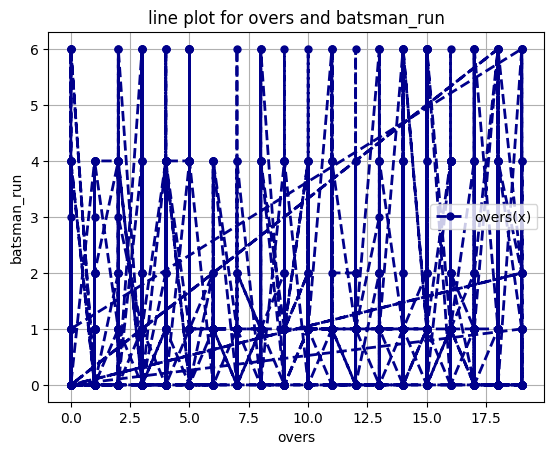

In [30]:
plt.plot(x1,y1,color='darkblue',linestyle='--',linewidth=2,marker='o',markersize=5,label='overs(x)')
plt.xlabel('overs')
plt.ylabel('batsman_run')
plt.title('line plot for overs and batsman_run')
plt.legend()
plt.grid(True)
plt.show()

Bar Plot

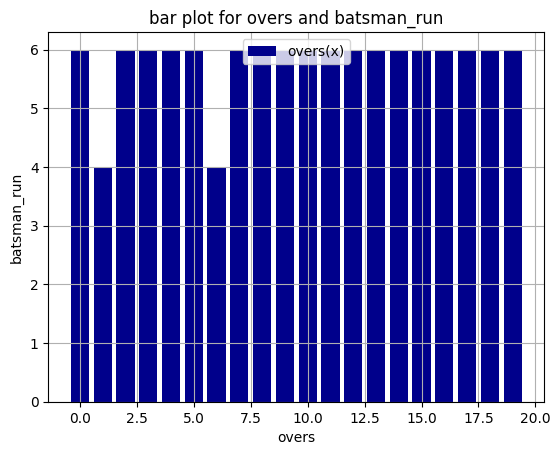

In [31]:
plt.bar(x1,y1,color='darkblue',label='overs(x)')
plt.xlabel('overs')
plt.ylabel('batsman_run')
plt.title('bar plot for overs and batsman_run')
plt.legend()
plt.grid(True)
plt.show()

Histogram

Text(0.5, 1.0, 'histogram for total_run')

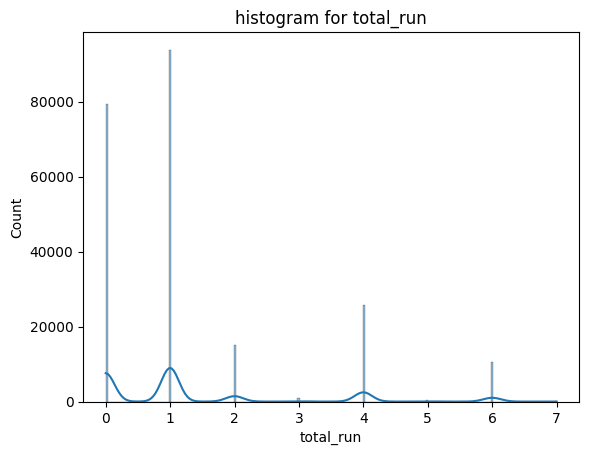

In [32]:
sns.histplot(data=df,x='total_run',kde=True)
plt.title('histogram for total_run')

Scatter Plot

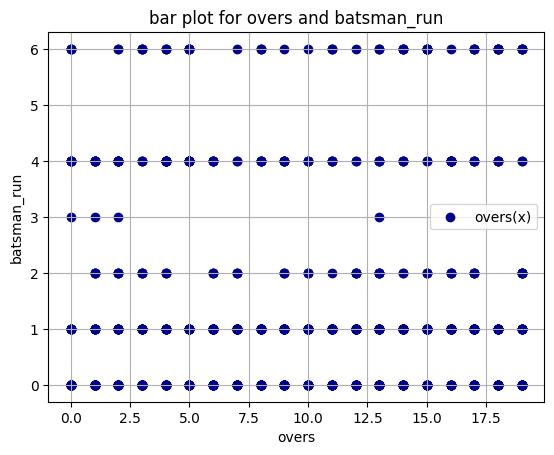

In [33]:
plt.scatter(x1,y1,color='darkblue',label='overs(x)')
plt.xlabel('overs')
plt.ylabel('batsman_run')
plt.title('bar plot for overs and batsman_run')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
df.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'BattingTeam'],
      dtype='object')

Heatmap

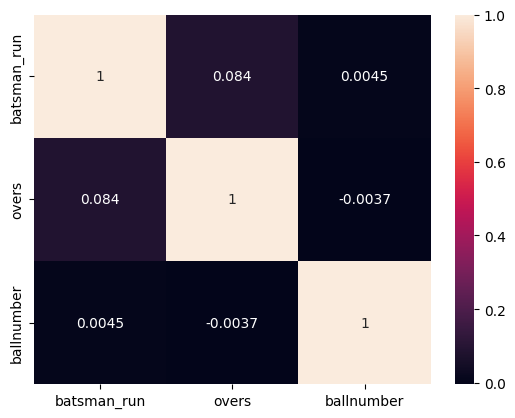

In [35]:
cm= df[['batsman_run','overs','ballnumber']].corr()
sns.heatmap(cm,annot=True)
plt.show()

Skew Handling

In [36]:
df1.skew()

ID                                         0.0
innings                                    0.0
overs                                      0.0
ballnumber                                 0.0
batsman_run                                0.0
                                          ... 
BattingTeam_Rajasthan Royals               0.0
BattingTeam_Rising Pune Supergiant         0.0
BattingTeam_Rising Pune Supergiants        0.0
BattingTeam_Royal Challengers Bangalore    0.0
BattingTeam_Sunrisers Hyderabad            0.0
Length: 1699, dtype: float64

Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest,f_classif

In [38]:
x = df1.drop('total_run', axis=1)

In [39]:
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features 


In [40]:
X_new = selector.fit_transform(x, y)


C:\Users\CSLAB\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3 ... 1695 1696 1697] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\CSLAB\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [41]:
selected_features = x.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['ID', 'BattingTeam_Lucknow Super Giants', 'BattingTeam_Mumbai Indians',
       'BattingTeam_Pune Warriors', 'BattingTeam_Punjab Kings',
       'BattingTeam_Rajasthan Royals', 'BattingTeam_Rising Pune Supergiant',
       'BattingTeam_Rising Pune Supergiants',
       'BattingTeam_Royal Challengers Bangalore',
       'BattingTeam_Sunrisers Hyderabad'],
      dtype='object')


In [42]:
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': selector.scores_}).sort_values(by='Score', ascending=False)
print("\nFeature Scores:")
print(feature_scores) 


Feature Scores:
                                      Feature  Score
0                                          ID    0.0
1                                     innings    NaN
2                                       overs    NaN
3                                  ballnumber    NaN
4                                 batsman_run    NaN
...                                       ...    ...
1693             BattingTeam_Rajasthan Royals    NaN
1694       BattingTeam_Rising Pune Supergiant    NaN
1695      BattingTeam_Rising Pune Supergiants    NaN
1696  BattingTeam_Royal Challengers Bangalore    NaN
1697          BattingTeam_Sunrisers Hyderabad    NaN

[1698 rows x 2 columns]


Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
Ss=StandardScaler()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
Ss = StandardScaler()
x_test_scaled = Ss.fit_transform(x_test)
x_train_scaled = Ss.fit_transform(x_train)

Classification

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

In [48]:
classifiers={'Logistic Regression':LogisticRegression(),'Decision Tree':DecisionTreeClassifier(),'svm':SVC(),'RFC':RandomForestClassifier()}

In [ ]:
for name,df in classifiers.items():
    df.fit(x_train_scaled,y_train)
    y_pred=df.predict(x_test_scaled)
    print(f"\n{name} results:")
    print("Accuracy:",accuracy_score(y_test,y_pred))
    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test,y_pred))
    print("\n Classification Report:")
    print(classification_report(y_test,y_pred))


Logistic Regression results:
Accuracy: 0.4045053218561218

 Confusion Matrix:
[[18280     0     0     0     0     0     0]
 [16741     0     0     0     0     0     0]
 [ 2789     0     0     0     0     0     0]
 [  145     0     0     0     0     0     0]
 [ 5105     0     0     0     0     0     0]
 [   15     0     0     0     0     0     0]
 [ 2116     0     0     0     0     0     0]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.58     18280
           1       0.00      0.00      0.00     16741
           2       0.00      0.00      0.00      2789
           3       0.00      0.00      0.00       145
           4       0.00      0.00      0.00      5105
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00      2116

    accuracy                           0.40     45191
   macro avg       0.06      0.14      0.08     45191
weighted avg       0.16      0.40     

C:\Users\CSLAB\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CSLAB\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CSLAB\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Decision Tree results:
Accuracy: 0.4045053218561218

 Confusion Matrix:
[[18280     0     0     0     0     0     0]
 [16741     0     0     0     0     0     0]
 [ 2789     0     0     0     0     0     0]
 [  145     0     0     0     0     0     0]
 [ 5105     0     0     0     0     0     0]
 [   15     0     0     0     0     0     0]
 [ 2116     0     0     0     0     0     0]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.58     18280
           1       0.00      0.00      0.00     16741
           2       0.00      0.00      0.00      2789
           3       0.00      0.00      0.00       145
           4       0.00      0.00      0.00      5105
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00      2116

    accuracy                           0.40     45191
   macro avg       0.06      0.14      0.08     45191
weighted avg       0.16      0.40      0.23 

C:\Users\CSLAB\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CSLAB\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CSLAB\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i